<span style="font-size: 22px;">The task is to create digraph which use some combination of implemented methods.</span>

<span style="font-size: 15px;">Developer task description:</span>
- <span style="font-size: 15px;">create empty digraph.</span>
- <span style="font-size: 15px;">add nodes to digraph - create DAG.</span>
- <span style="font-size: 15px;">create three strongly connected graphs.</span>
- <span style="font-size: 15px;">inject strongly connected graphs to DAG (SSC_3 to SSC_1 before).</span>

In [ ]:
import diblob as dib 

#Create digraph without nodes 
dag = dib.DigraphManager({'DAG': {}})
dag.add_nodes('A', 'B', 'C', 'D', 'E', 'F')
dib.display_digraph(dag('DAG'))

{
"DAG": {
    "F": [],
    "A": [],
    "B": [],
    "C": [],
    "D": [],
    "E": [],
},
}


In [ ]:
#Add nodes and create DAG
dag.connect_nodes(('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('D', 'F'))
dib.display_digraph(dag('DAG'))

{
"DAG": {
    "F": [],
    "A": ["B", "C"],
    "B": ["D"],
    "C": ["D"],
    "D": ["E", "F"],
    "E": [],
},
}


In [ ]:
#Create three strongly connected graphs

# 3-cycle
ssc_1 = dib.DigraphManager({'SSC_1': {'A1': ['B1'],
                                      'B1': ['C1'],
                                      'C1': ['A1']}}) 

# 4-cycle
ssc_2 = dib.DigraphManager({'SSC_2': {'A2': ['B2'],
                                      'B2': ['C2'],
                                      'C2': ['D2'],
                                      'D2': ['A2']}}) 

# 4-cycle with added edge ('A2', 'C2')
ssc_3 = dib.DigraphManager({'SSC_3': {'A3': ['B3', 'C3'],
                                      'B3': ['C3'],
                                      'C3': ['D3'],
                                      'D3': ['A3']}}) 

In [ ]:
#Inject 3-cycle to 4-cycle digraph, then inject all digraphs to DAG
ssc_1.inject(ssc_2, 'A1')
dag.inject(ssc_1, 'B')
dag.inject(ssc_3, 'C')

In [ ]:
dib.display_digraph(dag('DAG'))

{
"DAG": {
    "F": [],
    "SSC_1": {
        "C1": [{"SSC_2": ["B2", "D2", "C2", "A2"]}, {"DAG": ["D"]}],
        "SSC_2": {
            "B2": ["C2", {"SSC_1": ["B1"]}],
            "D2": ["A2", {"SSC_1": ["B1"]}],
            "C2": ["D2", {"SSC_1": ["B1"]}],
            "A2": ["B2", {"SSC_1": ["B1"]}],
        },
        "B1": ["C1", {"DAG": ["D"]}],
    },
    "A": [{"SSC_1": ["C1", "B1"]}, {"SSC_3": ["A3", "B3", "C3", "D3"]}],
    "SSC_3": {
        "A3": ["B3", "C3", {"DAG": ["D"]}],
        "B3": ["C3", {"DAG": ["D"]}],
        "C3": ["D3", {"DAG": ["D"]}],
        "D3": ["A3", {"DAG": ["D"]}],
    },
    "D": ["E", "F"],
    "E": [],
},
}


<span style="font-size: 17px;">All steps are presented below:</span>

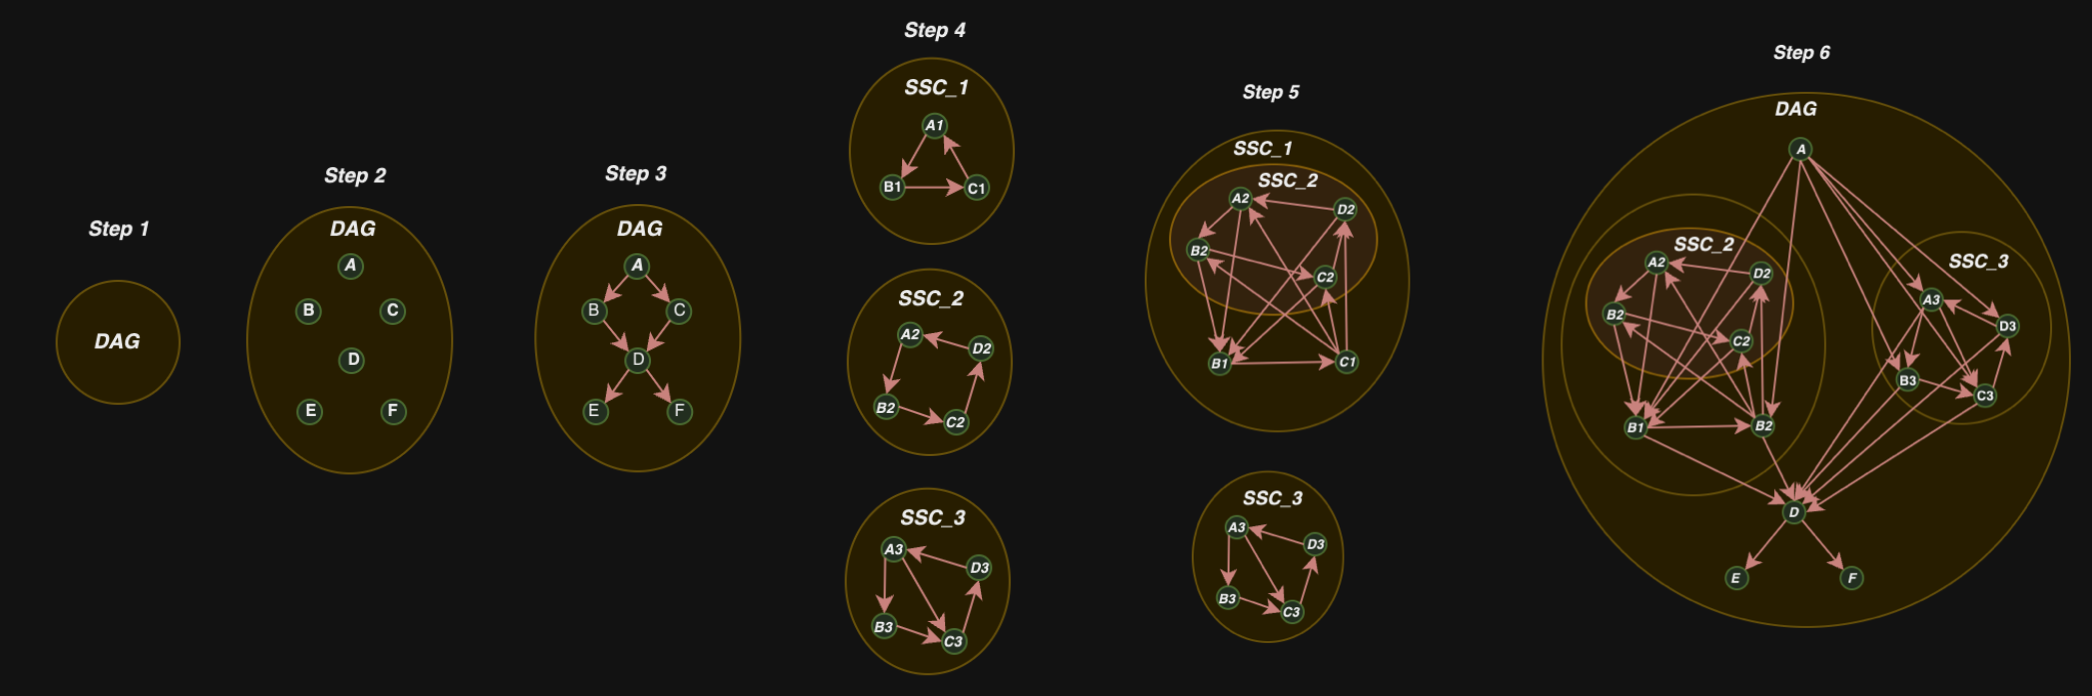
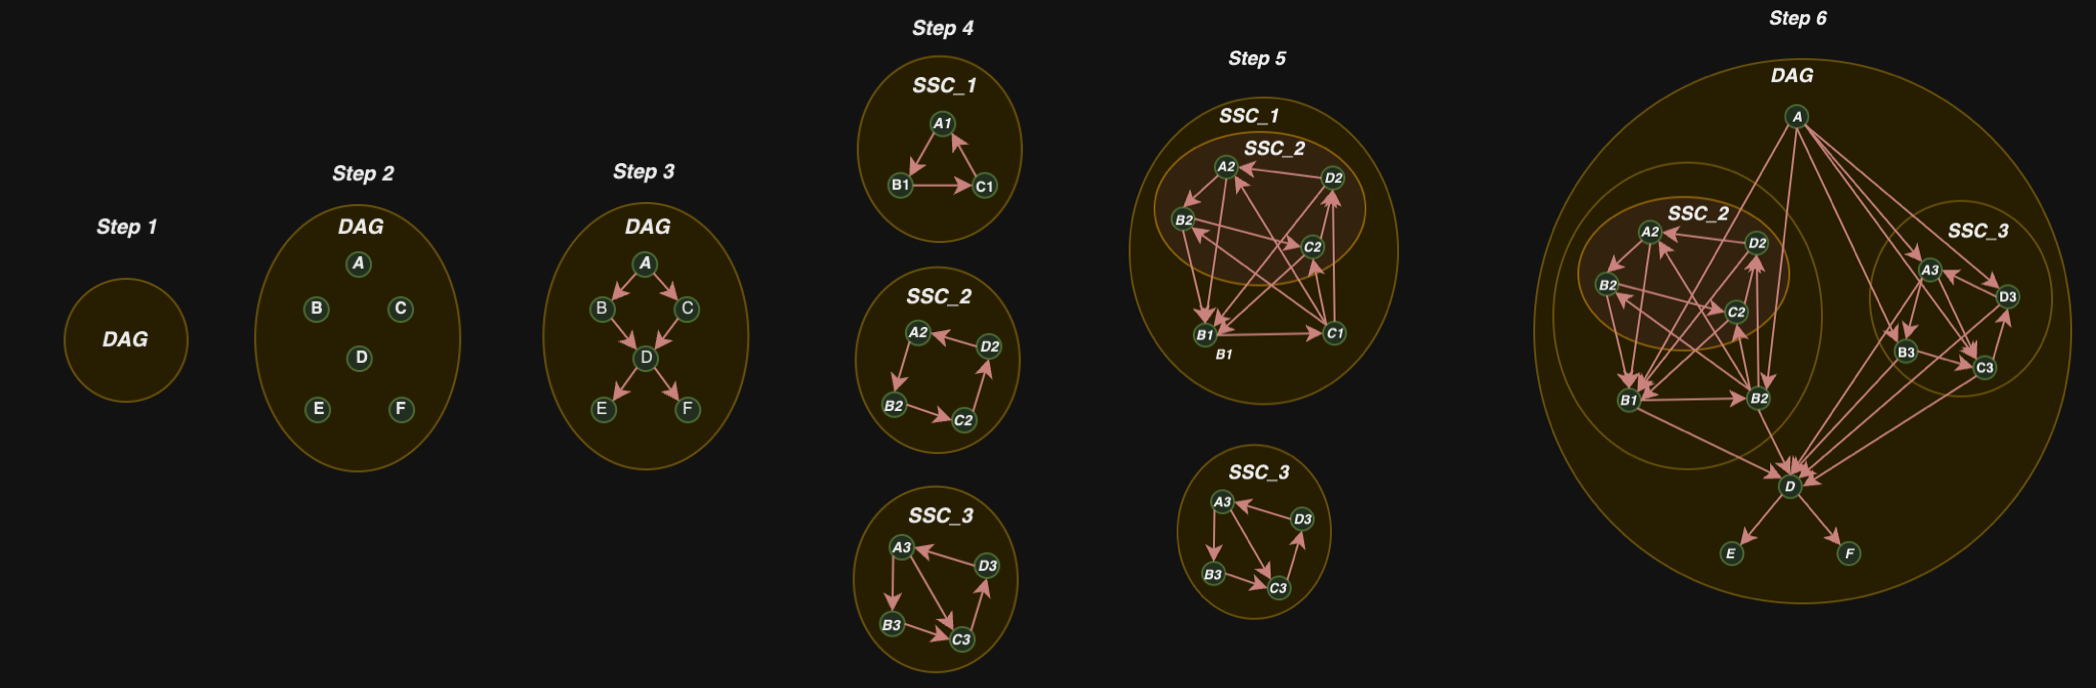


<span style="font-size: 22px;">On the other hand, lets assume developer received JSON created in previous steps (DAG).</span>

<span style="font-size: 15px;">Developer task description:</span>
- <span style="font-size: 15px;">extract strongly connected components JSONs for other team.</span>
- <span style="font-size: 15px;">create simple test cases (path coverage), where every SSC is covered by one path.</span>

<span style="font-size: 20px;">Received JSON representation:</span>
```
{
"DAG": {
    "A": [{"SSC_1": ["C1", "B1"]}, {"SSC_3": ["C3", "A3", "B3", "D3"]}],
    "SSC_3": {
        "C3": ["D3", {"DAG": ["D"]}],
        "A3": ["B3", "C3", {"DAG": ["D"]}],
        "B3": ["C3", {"DAG": ["D"]}],
        "D3": ["A3", {"DAG": ["D"]}],
    },
    "F": [],
    "E": [],
    "D": ["E", "F"],
    "SSC_1": {
        "SSC_2": {
            "A2": ["B2", {"SSC_1": ["B1"]}],
            "C2": ["D2", {"SSC_1": ["B1"]}],
            "D2": ["A2", {"SSC_1": ["B1"]}],
            "B2": ["C2", {"SSC_1": ["B1"]}],
        },
        "C1": [{"SSC_2": ["A2", "C2", "D2", "B2"]}, {"DAG": ["D"]}],
        "B1": ["C1", {"DAG": ["D"]}],
    },
},
}
```

In [ ]:
digraph = dib.DigraphManager({
"DAG": {
    "A": [{"SSC_1": ["C1", "B1"]}, {"SSC_3": ["C3", "A3", "B3", "D3"]}],
    "SSC_3": {
        "C3": ["D3", {"DAG": ["D"]}],
        "A3": ["B3", "C3", {"DAG": ["D"]}],
        "B3": ["C3", {"DAG": ["D"]}],
        "D3": ["A3", {"DAG": ["D"]}],
    },
    "F": [],
    "E": [],
    "D": ["E", "F"],
    "SSC_1": {
        "SSC_2": {
            "A2": ["B2", {"SSC_1": ["B1"]}],
            "C2": ["D2", {"SSC_1": ["B1"]}],
            "D2": ["A2", {"SSC_1": ["B1"]}],
            "B2": ["C2", {"SSC_1": ["B1"]}],
        },
        "C1": [{"SSC_2": ["A2", "C2", "D2", "B2"]}, {"DAG": ["D"]}],
        "B1": ["C1", {"DAG": ["D"]}],
    },
},
})


In [ ]:
#Let's apply flatten method to SSC_2 - SSC injected to other SSC is still SSC.
digraph.flatten("SSC_2")
dib.display_digraph(digraph("DAG"))

{
"DAG": {
    "SSC_1": {
        "B2": ["C2", "B1"],
        "D2": ["A2", "B1"],
        "A2": ["B2", "B1"],
        "C1": ["A2", "C2", "D2", "B2", {"DAG": ["D"]}],
        "C2": ["D2", "B1"],
        "B1": ["C1", {"DAG": ["D"]}],
    },
    "SSC_3": {
        "A3": ["B3", "C3", {"DAG": ["D"]}],
        "B3": ["C3", {"DAG": ["D"]}],
        "C3": ["D3", {"DAG": ["D"]}],
        "D3": ["A3", {"DAG": ["D"]}],
    },
    "D": ["E", "F"],
    "E": [],
    "F": [],
    "A": [{"SSC_1": ["C1", "B1"]}, {"SSC_3": ["C3", "A3", "B3", "D3"]}],
},
}


In [ ]:
#Extract SSC_1, SSC_3 JSONs:
ssc_1_json = dib.cut_outgoing_edges(digraph, "SSC_1")
ssc_3_json = dib.cut_outgoing_edges(digraph, "SSC_3")

#display_digraph also deal with JSON (not diblob)
dib.display_digraph(ssc_1_json)
dib.display_digraph(ssc_3_json)

{
"SSC_1": {
    "B2": ["C2", "B1"],
    "D2": ["A2", "B1"],
    "A2": ["B2", "B1"],
    "C1": ["A2", "C2", "D2", "B2"],
    "C2": ["D2", "B1"],
    "B1": ["C1"],
},
}
{
"SSC_3": {
    "A3": ["B3", "C3"],
    "B3": ["C3"],
    "C3": ["D3"],
    "D3": ["A3"],
},
}


In [20]:
"""
As we can see, in the graph there is 2 SSC (which are not single nodes). 
If we treat SSC as a node, the rest of the digraphs is DAG. 
Structure of dag is simple. If we want cover the nodes, we have two paths:

    A -> SSC_1 -> D -> E
    A -> SSC_3 -> D -> E

In effect we need to cover SSC_1 starting from B1 or C1 and ending with B1 or C1, and
cover SSC_3 starting from A3 or C3 and ending with any node.

We can create simple solution using Dijkstra algorithm.
"""

ssc_1 = dib.DigraphManager(ssc_1_json)
ssc_2 = dib.DigraphManager(ssc_3_json)


def simple_node_coverage_for_ssc(ssc, s, t):
    algorithm = dib.DijkstraAlgorithm(ssc)
    node_coverage = [s]

    while len(ssc.nodes) > len(node_coverage):
    
        min_distance_dict = algorithm.run(s)
        min_distance_dict = {key: value for key, value in min_distance_dict.items() 
                             if key not in node_coverage}

        farthest_node_id = max(min_distance_dict, 
                               key=lambda x: len(min_distance_dict[x]['min_path']))
        node_coverage += [node[1] for node in min_distance_dict[farthest_node_id]['min_path']]
        s = node_coverage[-1]
    
    #Go to the t
    min_distance_dict = algorithm.run(s)
    node_coverage += [node[1] for node in min_distance_dict[t]['min_path']]

    return node_coverage

print(simple_node_coverage_for_ssc(ssc_1, 'C1', 'B1'))
print(simple_node_coverage_for_ssc(ssc_2, 'A3', 'D3'))


['C1', 'A2', 'B1', 'C1', 'B2', 'C2', 'D2', 'B1']
['A3', 'C3', 'D3', 'A3', 'B3', 'C3', 'D3']


In [ ]:
"""
In effect, nodes coverage is achieved by 2 test cases: 
    A -> C1 -> A2 -> B1 -> C1 -> B2 -> C2 -> D2 -> B1 -> D -> E
    A -> A3 -> C3 -> D3 -> A3 -> C3 -> D3 -> D -> E
"""